# Diabetes KNN Classification

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Although there are no null values in the columns but some columns cannot accept the zero value.

In [4]:
for column in df.columns[1:6]:
    zero = df[column][df[column] == 0].count()
    mean = int(df[column].mean())
    print(f"{column:13} column has {zero:<4} zeros. Now the mean is {mean}")

Glucose       column has 5    zeros. Now the mean is 120
BloodPressure column has 35   zeros. Now the mean is 69
SkinThickness column has 227  zeros. Now the mean is 20
Insulin       column has 374  zeros. Now the mean is 79
BMI           column has 11   zeros. Now the mean is 31


First replace all zeros with null values, then calculate the mean with skipna=True. You see that the mean of Insulin column has changed very much.

In [5]:
for column in df.columns[1:6]:
    df[column] = df[column].replace(0, None)
    mean = int(df[column].mean(skipna=True))
    print(f"New mean of the {column:13} column is {mean}")

New mean of the Glucose       column is 121
New mean of the BloodPressure column is 72
New mean of the SkinThickness column is 29
New mean of the Insulin       column is 155
New mean of the BMI           column is 32


In [6]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now replace all null values with new mean of each column.

In [7]:
for column in df.columns[1:6]:
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].fillna(mean)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Matrix of features and labels

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (768, 8)
y (768,)


## Splitting the dataset to training set and testing set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (614, 8)
X_test (154, 8)
y_train (614,)
y_test (154,)


## Scaling features

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create the classification model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=11)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

## Predicting the test dataset

In [13]:
y_pred = knn_clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



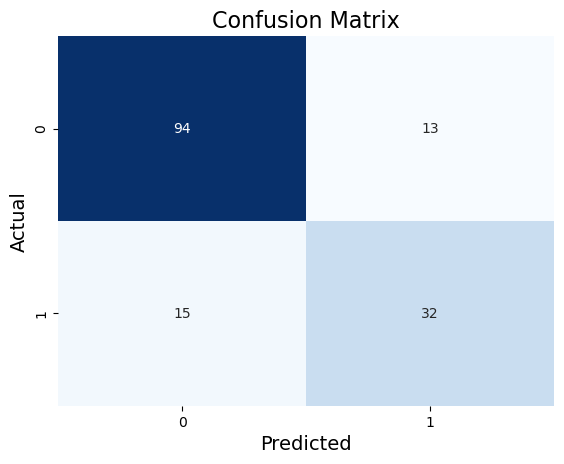

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=16);